In [1]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
train_data_path = "../sdgp_dataset/train"
validation_data_path = "../sdgp_dataset/val"

train_data_generator = ImageDataGenerator(rescale = 1/255, zoom_range = 0.2, horizontal_flip = True, validation_split=0.1)
validation_data_generator = ImageDataGenerator(rescale = 1/255)

train_set = train_data_generator.flow_from_directory(train_data_path, target_size=(256,256), batch_size=64, color_mode='grayscale',class_mode='categorical')
validation_set = validation_data_generator.flow_from_directory(validation_data_path, target_size=(256,256), batch_size=64, color_mode='grayscale',class_mode='categorical')

Found 2149 images belonging to 2 classes.
Found 268 images belonging to 2 classes.


In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 1), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [4]:
history = model.fit(
    train_set,
    epochs = 50,
    validation_data = validation_set,
    shuffle = True,
    validation_steps = len(validation_set)
)

Epoch 1/50
34/34 [==============================] - 41s 1s/step - loss: 0.9111 - accuracy: 0.5621 - val_loss: 0.5830 - val_accuracy: 0.7201
Epoch 2/50
34/34 [==============================] - 18s 521ms/step - loss: 0.5526 - accuracy: 0.7124 - val_loss: 0.4562 - val_accuracy: 0.8022
Epoch 3/50
34/34 [==============================] - 18s 515ms/step - loss: 0.4464 - accuracy: 0.7929 - val_loss: 0.2987 - val_accuracy: 0.8955
Epoch 4/50
34/34 [==============================] - 18s 515ms/step - loss: 0.3480 - accuracy: 0.8497 - val_loss: 0.2460 - val_accuracy: 0.9142
Epoch 5/50
34/34 [==============================] - 18s 516ms/step - loss: 0.2786 - accuracy: 0.8841 - val_loss: 0.1515 - val_accuracy: 0.9403
Epoch 6/50
34/34 [==============================] - 18s 520ms/step - loss: 0.2238 - accuracy: 0.9148 - val_loss: 0.1051 - val_accuracy: 0.9701
Epoch 7/50
34/34 [==============================] - 18s 520ms/step - loss: 0.1758 - accuracy: 0.9344 - val_loss: 0.0721 - val_accuracy: 0.9813
Ep

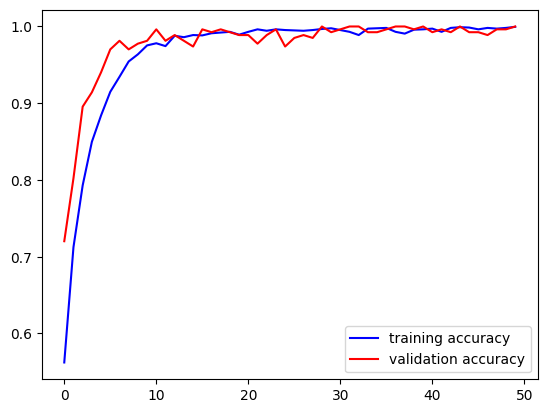

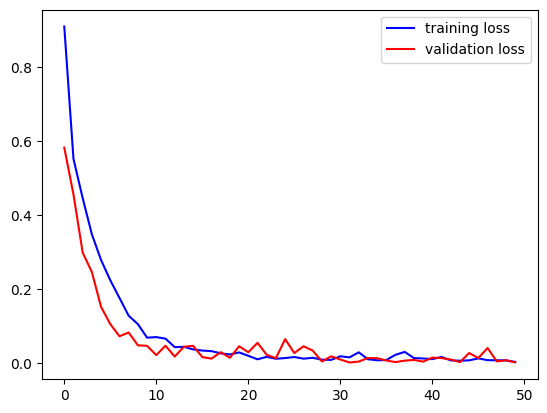

In [5]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label = "training accuracy")
plt.plot(epochs, val_accuracy, "r", label = "validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label = "training loss")
plt.plot(epochs, val_loss, "r", label = "validation loss")
plt.legend()
plt.show()

In [6]:
model.save("model.h5")

In [7]:
# import packages
import keras.utils as image
from keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np
import os

In [8]:
model = load_model("model.h5")

In [9]:
def load_image(img_path):
    """This function loads an image"""
    img = image.load_img(img_path, target_size=(256, 256), color_mode='grayscale')
    img_tensor = image.img_to_array(img)  # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)  # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.
    return img_tensor

In [10]:
y_true = []
y_prediction = []

# loop over test data
for img in os.listdir("../sdgp_dataset/test/fatigue"):
    img_tensor = load_image("../sdgp_dataset/test/fatigue/" + img)
    prediction = model.predict(img_tensor)[0][1] # probability of yawn class
    y_true.append(1) # fatigue class is labeled 1
    y_prediction.append(prediction >= 0.5) # threshold of 0.5 for binary classification

for img in os.listdir("../sdgp_dataset/test/alert"):
    img_tensor = load_image("../sdgp_dataset/test/alert/" + img)
    prediction = model.predict(img_tensor)[0][1] # probability of yawn class
    y_true.append(0) # alert class is labeled 0
    y_prediction.append(prediction >= 0.5) # threshold of 0.5 for binary classification

1/1 [==============================] - 0s 17ms/step


In [11]:
target_names = ['alert', 'fatigued']
print(classification_report(y_true, y_prediction, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.98      0.98      0.98       126
    fatigued       0.99      0.98      0.98       145

    accuracy                           0.98       271
   macro avg       0.98      0.98      0.98       271
weighted avg       0.98      0.98      0.98       271

